Nous importons les données d'un centre d'appels (http://iew3.technion.ac.il/serveng/callcenterdata/) : chaque ligne correspond à un appel, sur lequel nous connaissons l'heure d'appel et les durées passées avec l'automate, en attente et avec l'agent. Nous connaissons aussi le nom de l'agent.

Notre client, ce centre d'appels, souhaite savoir ce que la BI peut lui apporter.

Il nous a déjà indiqué qu'il facturait 99cts par appel et qu'il avait 40k€ par mois de charges fixes.

# Import des modules nécessaires

Nous allons utiliser pandas pour l'importation et la gestion des tables de données, numpy pour les calculs matriciels et matplotlib pour les graphiques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import du fichier et stats de base

Commençons déjà par importer le mois de janvier (les données sont séparées par mois).

On voit déjà qu'en janvier avec 31599 appels, sachant qu'on a 40000€ de charges fixes, le client n'a pas été rentable.

In [2]:
df = pd.read_csv('january.txt',
                 sep = '\t',
                 dtype = {'customer_id': np.int64},
                 parse_dates = ['date']
                )

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 17 columns):
vru+line       31599 non-null object
call_id        31599 non-null int64
customer_id    31599 non-null int64
priority       31599 non-null int64
type           31599 non-null object
date           31599 non-null datetime64[ns]
vru_entry      31599 non-null object
vru_exit       31599 non-null object
vru_time       31599 non-null int64
q_start        31599 non-null object
q_exit         31599 non-null object
q_time         31599 non-null int64
outcome        31599 non-null object
ser_start      31599 non-null object
ser_exit       31599 non-null object
ser_time       31599 non-null int64
server         31599 non-null object
dtypes: datetime64[ns](1), int64(6), object(10)
memory usage: 4.1+ MB


,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,33116,9664491,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
2,AA0101,33118,27997683,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL
3,AA0101,33119,0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH
4,AA0101,33120,0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL


# Import de tous les fichiers

Nous importons maintenant tous les mois de l'année, chacun provenant d'un fichier différent. On voit que l'import avec pandas peut être automatisé sous la forme d'une boucle for.

In [3]:
liste_mois = [
    'january',
    'february',
    'march',
    'april',
    'may',
    'june',
    'july',
    'august',
    'september',
    'october',
    'november',
    'december'
]

ldf = []

for mois in liste_mois:
    print(mois)
    ldf += [pd.read_csv(mois + '.txt',
                 sep = '\t',
                 dtype = {'customer_id': np.int64},
                 parse_dates = ['date']
                )]
    
df = pd.concat(ldf)

df.info()

df.head()

january
february
march
april
may
june
july


C:\Users\pierr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


august
september
october
november
december
<class 'pandas.core.frame.DataFrame'>
Int64Index: 444448 entries, 0 to 43064
Data columns (total 17 columns):
vru+line       444448 non-null object
call_id        444448 non-null int64
customer_id    444448 non-null int64
priority       444448 non-null object
type           444448 non-null object
date           444448 non-null datetime64[ns]
vru_entry      444448 non-null object
vru_exit       444448 non-null object
vru_time       444448 non-null object
q_start        444448 non-null object
q_exit         444448 non-null object
q_time         444448 non-null object
outcome        444448 non-null object
ser_start      444448 non-null object
ser_exit       444448 non-null object
ser_time       444448 non-null object
server         444436 non-null object
dtypes: datetime64[ns](1), int64(2), object(14)
memory usage: 61.0+ MB


,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,33116,9664491,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
2,AA0101,33118,27997683,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL
3,AA0101,33119,0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH
4,AA0101,33120,0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL


On peut facilement analyser quelles formes prennent les premières lignes.

A noter que le centre a reçu 444 448 appels dans l'année, soit environ 37 000 par mois.

## Analyse des aberrations

La première étape importante est de traiter les aberrations (les valeurs étranges). On y va colonne par colonne (pour les IDs on s'en fiche un peu par contre).

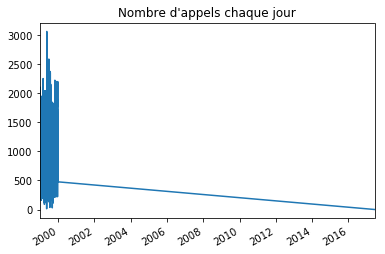

In [4]:
df['date'].value_counts().plot(kind = 'line')
plt.title("Nombre d'appels chaque jour")
plt.show()

Des valeurs après 2000 ? Allons voir de plus près.

In [5]:
df[df['date'] > '2000']

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
9142,AA0108,3364,0,0 TT,990717,2017-06-07 02:17:57,2:18:09,12,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
9236,AA0108,3458,0,0 TT,990729,2017-06-07 09:16:11,9:16:27,16,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
12078,AA0111,3590,0,0 TT,990703,2017-06-07 13:56:19,13:56:22,3,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15210,AA0116,6178,0,0 IN,990706,2017-06-07 12:02:11,12:02:34,23,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15388,AA0116,6357,0,0 IN,990719,2017-06-07 19:26:18,19:26:24,6,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
7803,AA0108,3688,0,0 TT,990830,2017-06-07 13:54:07,13:54:13,6,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
10820,AA0115,22504,0,0 PS,990802,2017-06-07 16:09:33,16:09:37,4,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
12006,AA0116,7055,0,0 IN,990809,2017-06-07 11:41:22,11:41:34,12,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
12147,AA0116,7199,0,0 IN,990812,2017-06-07 20:25:06,20:25:21,15,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
9664,AA0111,4137,0,0 TT,990914,2017-06-07 09:47:23,9:47:29,6,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN


On en a une dizaine de lignes concernées seulement, avec des valeurs étranges ou NaN. On enlève donc ces lignes.

In [6]:
df = df[df['date'] < '2000-01-01']

Et pour toutes les colonnes d'heures ? Vérifions que ce sont bien toutes des heures (entre minuit et minuit)

In [9]:
for col in ['vru_entry', 'vru_exit', 'q_start', 'q_exit', 'ser_start', 'ser_exit']:
    df.loc[:, col] = pd.to_timedelta(df[col])

print(df[['vru_entry', 'vru_exit', 'q_start', 'q_exit', 'ser_start', 'ser_exit']].min())

print(df[['vru_entry', 'vru_exit', 'q_start', 'q_exit', 'ser_start', 'ser_exit']].max())

vru_entry   00:00:01
vru_exit    00:00:08
q_start     00:00:00
q_exit      00:00:00
ser_start   00:00:00
ser_exit    00:00:00
dtype: timedelta64[ns]
vru_entry   23:59:58
vru_exit    23:59:59
q_start     23:59:59
q_exit      23:59:59
ser_start   23:59:58
ser_exit    23:59:59
dtype: timedelta64[ns]


# Quelques graphiques maintenant

Nous allons afficher (à l'aide d'une fonction) le CA réalisé chaque mois par chaque agent.

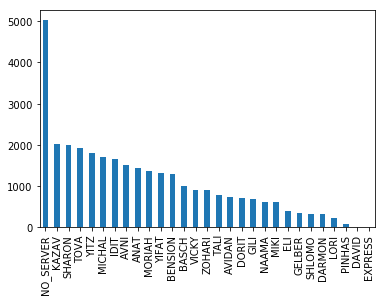

In [10]:
def ca_realise_mois(mois):
    df1 = df[df['date'].dt.month == mois]
    
    df1['server'].value_counts().plot(kind = 'bar')
    
    plt.title
    plt.show()
    
    return

ca_realise_mois(1)

Un agent (NO_SERVER) semble virtuel. En creusant la doc, on se rend compte que ce sont les appels qui n'ont pas abouti. On va donc l'enlever. On va aussi ajouter des explications à notre graphique et le rendre plus joli.

In [11]:
dict_mois = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}

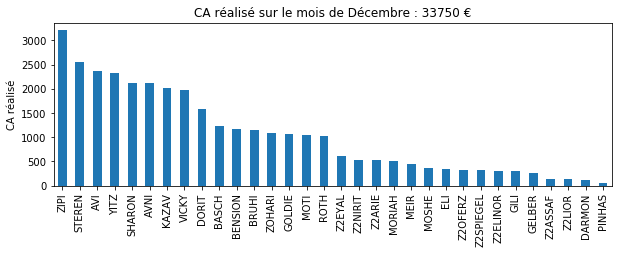

In [12]:
def ca_mois(ind_mois, plot = True):
    condition = np.logical_and(np.logical_and(df['date'].dt.month == ind_mois,
                               df['server'] != "NO_SERVER"),
                               df['outcome'] == 'AGENT')

    (df[condition]['server'].value_counts() * 0.99).plot(kind = 'bar',
                                                         figsize = (10, 3))
    
    plt.title('CA réalisé sur le mois de ' +
              dict_mois[ind_mois] +
              " : " +
              str(df[condition].shape[0]) +
              " €"
             )
    plt.ylabel('CA réalisé')
    
    if plot:
        plt.show()
    else:
        plt.savefig('ca.png')
    
    return

ca_mois(12)

Certains agents font très peu de chiffre. Mais peut-être ont-ils peu travaillé sur le mois. Regardons de plus près.

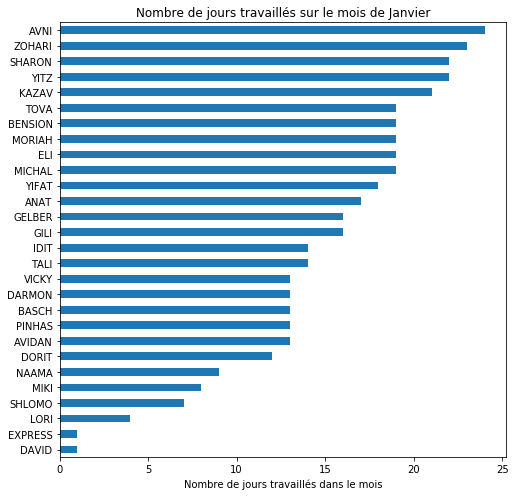

In [14]:
def nb_jours(ind_mois, plot = True):
    condition = np.logical_and(np.logical_and(df['date'].dt.month == ind_mois,
                               df['server'] != "NO_SERVER"),
                               df['outcome'] == 'AGENT')
    
    dft = df[condition].groupby('server')['date'].nunique()

    dft.sort_values().plot(kind = 'barh', figsize = (8, 8))
    
    plt.title('Nombre de jours travaillés sur le mois de ' +
              dict_mois[ind_mois]
             )
    plt.ylabel('')
    plt.xlabel('Nombre de jours travaillés dans le mois')
    
    if plot:
        plt.show()
    else:
        plt.savefig('nb_jours.png')
    
    return

nb_jours(1)

Etrange, David a vraiment travaillé très peu. Regardons les données détaillées pour David en janvier.

In [15]:
df[np.logical_and(df['server'] == 'DAVID', df['date'].dt.month == 1)]

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
2283,AA0102,29312,0,0,NW,1999-01-18,00:35:41,00:35:59,18,00:00:00,00:00:00,0,AGENT,00:35:58,00:37:30,92,DAVID
7157,AA0105,34171,0,0,NW,1999-01-18,00:40:19,00:40:28,9,00:40:28,00:40:57,29,AGENT,00:40:56,00:41:40,44,DAVID
9686,AA0107,2185,24620031,2,TT,1999-01-18,00:54:37,00:54:39,2,00:00:00,00:00:00,0,AGENT,00:54:38,00:55:10,32,DAVID
9916,AA0108,1300,0,0,TT,1999-01-18,00:57:49,00:57:51,2,00:00:00,00:00:00,0,AGENT,00:57:50,00:58:21,31,DAVID
12508,AA0110,28360,24620031,2,PS,1999-01-18,01:17:02,01:17:07,5,01:17:07,01:17:44,37,AGENT,01:17:44,01:18:15,31,DAVID
13403,AA0111,1698,0,0,TT,1999-01-18,01:01:18,01:01:20,2,00:00:00,00:00:00,0,AGENT,01:01:19,01:02:05,46,DAVID
13639,AA0112,1612,24620031,2,TT,1999-01-18,01:27:00,01:27:02,2,00:00:00,00:00:00,0,AGENT,01:27:02,01:28:36,94,DAVID


Effectivement, il a travaillé un seul jour, de 00:30 à 01:30...

Maintenant, on peut évaluer la productivité des agents en divisant le CA rapporté par le nombre de jours travaillés.

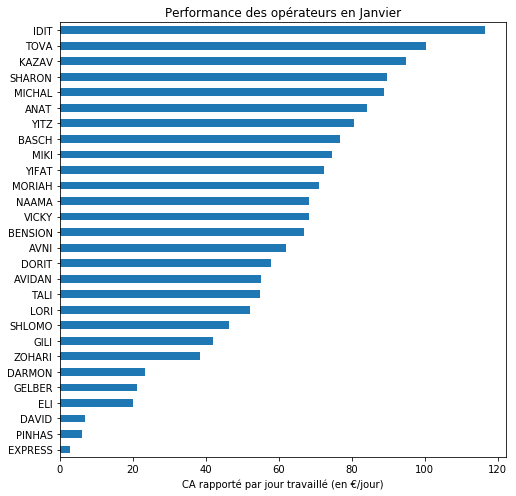

In [16]:
def ratio(ind_mois, plot = True):
    condition = np.logical_and(np.logical_and(df['date'].dt.month == ind_mois,
                               df['server'] != "NO_SERVER"),
                               df['outcome'] == 'AGENT')
    
    df1 = df[condition]['server'].value_counts() * 0.99
    
    df2 = df[condition].groupby('server')['date'].nunique()

    (df1/df2).sort_values().plot(kind = 'barh', figsize = (8, 8))
    
    plt.title('Performance des opérateurs en ' +
              dict_mois[ind_mois]
             )
    plt.ylabel('')
    plt.xlabel('CA rapporté par jour travaillé (en €/jour)')
    
    if plot:
        plt.show()
    else:
        plt.savefig('ratio.png')
    
    return

ratio(1)

Voilà, on a une bien meilleure idée de l'entreprise, de sa rentabilité, et de ses perspectives.

Il semble important d'augmenter les tarifs pour devenir rentable. L'efficacité moyenne des agents est aussi très variable ; c'est un axe à creuser.

Enfin, on pourrait tester d'autres modes de tarification (à la minute par exemple).